<table style="border:1px solid gray">
    <thead style="border:1px solid gray">
        <tr>
            <th>index</th>
            <th>df명</th>
            <th>설명</th>
            <th>비교</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>0</td>
            <td>df0_base</td>
            <td>최소한의 전처리만 진행</td>
            <td>다른 dataframe 검증할 때 비교</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Date</b></td>
        </tr>
        <tr>
            <td>1</td>
            <td>df1_date</td>
            <td>날짜 데이터 포함</td>
            <td rowspan=3>df0_base, df1_date, df3_date 비교 후,<br>데이터 추가 후 df2_date와 비교</td>
        </tr>
        <tr>
            <td>2</td>
            <td>df2_date</td>
            <td>날짜 데이터 제거</td>
        </tr>
        <tr>
            <td>3</td>
            <td>df3_date</td>
            <td>날짜 데이터 one hot encoding</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Adding columns</b></td>
        </tr>
        <tr>
            <td>4</td>
            <td>df4_name</td>
            <td>어종별 수 컬럼 추가</td>
            <td rowspan=2>df0_base<br>df4_name<br>df5_import</td>
        </tr>
        <tr>
            <td>5</td>
            <td>df5_import</td>
            <td>수입용도 수 컬럼 추가</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Dropping Columns</b></td>
        </tr>
        <tr>
            <td>6</td>
            <td>df6_caegory</td>
            <td>CATEGORY_2, P_NAME 컬럼 제거</td>
            <td rowspan=2>df0_base<br>df6_category<br>df7_category</td>
        </tr>
        <tr>
            <td>7</td>
            <td>df7_category</td>
            <td>CATEGORY_1, CATEGORY_2 컬럼 제거</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Adding Data</b></td>
        </tr>
        <tr>
            <td>8</td>
            <td>df8_add</td>
            <td>제조국 날씨, 한국 날씨, 원유 종가, 염도, 소비자물가지수 data 추가</td>
            <td>feature 중요도 파악<br>상관관계 파악</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Normalization</b></td>
        </tr>
        <tr>
            <td>9</td>
            <td>df9_add</td>
            <td>numerical feature 에 대한 정규화 진행</td>
            <td>df0_base<br>feature 중요도 파악<br>상관관계 파악</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Filling Missing Values</b></td>
        </tr>
        <tr>
            <td>10</td>
            <td>df10_fillna</td>
            <td>fillna(method=ffill)로 날씨 결측치 처리</td>
            <td rowspan=2>df0_base<br>df10_fillna<br>df11_fillna</td>
        </tr>
        <tr>
            <td>11</td>
            <td>df11_fillna</td>
            <td>fillna(method=bfill)로 날씨 결측치 처리</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Processing Outliers</b></td>
        </tr>
        <tr>
            <td>12</td>
            <td>df12_outlier</td>
            <td>전체 날씨 데이터 정규화 후 outlier 일괄 제거</td>
            <td rowspan=2>df0_base<br>df12_outlier<br>df13_outlier</td>
        </tr>
        <tr>
            <td>13</td>
            <td>df13_outlier</td>
            <td>나라별로 최저/최고 기온 파악 후 outlier 개별 제거</td>
        </tr>
        <tr style="border:1px solid gray">
            <td colspan=4 style="text-align: center"><b>Grouping</b></td>
        </tr>
        <tr>
            <td>13</td>
            <td></td>
            <td></td>
            <td></td>
        </tr>
    </tbody>
</table>

# 전처리 가설 검증
- df_train + 추가데이터 전부 사용  
- 5개 나라에 대해서만 진행('칠레', '중국', '노르웨이', '태국', '베트남') > ctry_list 변수에 포함되어 있음

# Setting

In [ ]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Visuzliation Setting
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
from matplotlib import colors
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [ ]:
from datetime import date, timedelta


def set_week(df, date):
    '''
    df : datetime 형식의 컬럼을 가지고 있는 dataframe
    date : df에서 datetime 형식을 가진 컬럼명
    return : date의 연도 컬럼과 주차 컬럼을 추가한 dataframe
    '''
    df[date] = pd.to_datetime(df[date])
    df[date] = df[date].dt.date
    df['year'] = df.apply(func=lambda x: x[date].isocalendar()[0], axis=1)
    df['week'] = df.apply(func=lambda x: x[date].isocalendar()[1], axis=1)
    df.drop(date, axis=1, inplace=True)
    

def check_week(df):
    '''
    df에 date가 전부 있는지 확인
    '''
    cnt = 0
    sdate = date(2015, 12, 28)   # start date
    edate = date(2019, 12, 30)   # end date
    delta = edate - sdate       # as timedelta
    mem = set()
    
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        year, week = day.isocalendar()[0], day.isocalendar()[1]
        if year * 100 + week in mem:
          continue
        mem.add(year * 100 + week)
        if df[(df['year'] == year) & (df['week'] == week)].empty:
          print((year, week), end="")
          cnt += 1
    if cnt > 0:
        print()
    print("missing", cnt, "values")    

In [ ]:
def RMSE(y, y_pred):
    return mean_squared_error(y, y_pred)**0.5


def train_model(train_data, target_data, model=LinearRegression()):  # baseline model : LInearRegression
    x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, random_state=0)

    model.fit(x_train, y_train)
    print("Model Training Complete!")

    pred_train, pred_test = model.predict(x_train), model.predict(x_test)
    
    plt.figure(figsize=(10, 8))
#     plt.scatter(pred_train, y_train, s=10)
    sns.regplot(pred_train, y_train, color='g')
    plt.xlabel("Predicted price")
    plt.ylabel("Actual price")
    plt.show()

    # cvs = cross_val_score(model, x_test, y_test, cv = 5)
    # print(">> cross_val_score mean =", cvs.mean())
    print(">> RMSE train =", RMSE(y_train, pred_train))
    print(">> RMSE validation =", RMSE(y_test, pred_test))
    print(">> MAE train =", mean_absolute_error(pred_train, y_train))
    print(">> MAE validation =", mean_absolute_error(pred_test, y_test))
    print("-------------------------------------------------")
    
    return model

    
def print_importance(model, df, added_columns):
    importance = model.coef_
    fs_data = []
    for i, x in enumerate(importance):
        fs_data.append([abs(x), df.columns[i]])
    fs_data.sort(key=lambda x: x[0], reverse=True)
   
    # 추가한 컬럼의 중요도
    for i in range(len(fs_data)):
        if fs_data[i][1] in added_columns:
            print(fs_data[i][1], ":", fs_data[i][0] ,">", i, "순위")
    print("————————————————————————")
    print("총", len(fs_data) , "개")
    
    return fs_data

In [ ]:
root = os.path.join(os.getcwd(), 'DATA')

In [ ]:
ctry_list = ['칠레', '중국', '노르웨이', '태국', '베트남']  # 사용할 나라 목록

# Import Data

In [ ]:
df_train = pd.read_excel(os.path.join(root, 'train.xlsx'))
df_weather_code = pd.read_csv(os.path.join(root, 'raw_weather_code.csv'), header=None, index_col=0)
weather_list = [pd.read_csv(os.path.join(root, 'raw_weather_20151228_20161227.csv'), encoding='euc-kr') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20161228_20171227.csv'), encoding='euc-kr') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20171228_20181227.csv'), encoding='euc-kr') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20181228_20191227.csv'), encoding='euc-kr') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20191228_20201227.csv'), encoding='euc-kr') , 
                pd.read_csv(os.path.join(root, 'raw_weather_20201228_20210818.csv'), encoding='euc-kr')]
df_oil = pd.read_csv(os.path.join(root, 'preprocessed_oil.csv'))
df_weather = pd.read_csv(os.path.join(root, 'preprocessed_weather.csv'))
df_weather_kr = pd.read_csv(os.path.join(root, 'preprocessed_weather_korea.csv'))
df_cpi = pd.read_csv(os.path.join(root, 'preprocessed_cpi.csv'))
df_exchange = pd.read_csv(os.path.join(root, 'preprocessed_exchange.csv'))

제조국 날씨의 경우 결측치 처리 과정이 필요하기 때문에 raw data를 가져온다

# df_train

In [ ]:
df_train.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [ ]:
df_train_main = df_train[((df_train['CTRY_1']=='칠레') | (df_train['CTRY_1']=='중국') | (df_train['CTRY_1']=='노르웨이') | (df_train['CTRY_1']=='태국') | (df_train['CTRY_1']=='베트남')) &  ((df_train['CTRY_2'] == '중국') | (df_train['CTRY_2']=='노르웨이') | (df_train['CTRY_2'] == '태국') | (df_train['CTRY_2']=='베트남'))]

df_train_main # 주요국만 추출

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340
5,2015-12-28,수산물,중국,중국,판매용,어류,복어,은밀복,냉동,2.167951
6,2015-12-28,수산물,중국,중국,판매용,어류,옥돔,옥돔,냉동,5.145111
7,2015-12-28,수산물,중국,중국,판매용,어류,복어,까치복,냉동,4.265697
8,2015-12-28,수산물,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",7.202863
...,...,...,...,...,...,...,...,...,...,...
42066,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,고등어,고등어,냉동,2.191897
42067,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,냉동,4.108244
42069,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,낙지,낙지,활,8.282274
42071,2019-12-30,수산물,중국,중국,판매용,패류 멍게류,바지락,바지락,활,0.852967


# df0_base

## preprocessing

In [ ]:
df_train_main.drop('P_TYPE',axis=1,inplace=True)

In [ ]:
df_train_copy = df_train_main.copy()

set_week(df_train_copy, 'REG_DATE')

check_week(df_train_copy) # 2017년 2주차에 결측치 존재

(2017, 2)
missing 1 values


In [ ]:
df0_base = df_train_main.copy()

df0_base = df0_base.replace([np.datetime64('2017-01-01'), np.datetime64('2017-01-06')],
                            [np.datetime64('2017-01-02'), np.datetime64('2017-01-09')]) # 결측치 제거를 위해 2017/01/01 -> 2017/01/06 , 2017/01/02 -> 2017/01/09 값 대치

import_type_list = set()
for tmp in df0_base.P_IMPORT_TYPE.unique():
    for a in tmp.split(','):
        import_type_list.add(a)

In [ ]:
for name in import_type_list:
    df0_base[name] = 0
    df0_base.loc[df0_base['P_IMPORT_TYPE'].str.contains(name, regex=False), name] = 1

In [ ]:
set_week(df0_base, 'REG_DATE')

In [ ]:
check_week(df0_base) # 결측치 제거 완료

missing 0 values


## Encoding

In [ ]:
df0_base.drop('P_IMPORT_TYPE',axis=1,inplace=True)

df0_base_encoding = pd.get_dummies(df0_base,columns=['CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1','CATEGORY_2','P_NAME'])

df0_base_encoding

,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,year,week,CTRY_1_노르웨이,CTRY_1_베트남,CTRY_1_중국,CTRY_1_칠레,CTRY_1_태국,CTRY_2_노르웨이,CTRY_2_베트남,CTRY_2_중국,CTRY_2_태국,P_PURPOSE_반송품(기타),P_PURPOSE_외화획득용 원료,P_PURPOSE_자사제품제조용,P_PURPOSE_판매용,...,P_NAME_적새우,"P_NAME_전갱이,POMPANO",P_NAME_젓새우,P_NAME_조피볼락,P_NAME_주꾸미,P_NAME_주름백합,P_NAME_쥐노래미,P_NAME_쥐치,P_NAME_진홍퉁돔,P_NAME_참게,P_NAME_참돔,P_NAME_참복,P_NAME_참조기,P_NAME_청각,P_NAME_청새치,P_NAME_청어알,P_NAME_칠성장어,P_NAME_코드아이스피쉬,P_NAME_큰구슬우렁이,P_NAME_큰민어,P_NAME_키조개,P_NAME_톱날꽃게,P_NAME_틸라피아,P_NAME_피뿔고둥,P_NAME_피조개,P_NAME_학공치,P_NAME_해물혼합,P_NAME_해삼,P_NAME_해파리,P_NAME_홍다리얼룩새우,P_NAME_홍민어,P_NAME_홍어,P_NAME_홍합,P_NAME_화살오징어,P_NAME_황다랑어,P_NAME_황새치,P_NAME_황적퉁돔,P_NAME_흑기흉상어,P_NAME_흑밀복,P_NAME_흰다리새우
4,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,1,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42067,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42069,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42071,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Result

Model Training Complete!


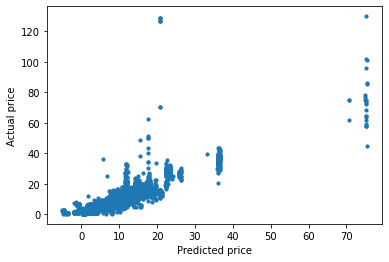

>> RMSE train = 3.420895416653359
>> RMSE validation = 342535374.2466915
>> MAE train = 1.5506697029567835
>> MAE validation = 9044887.336092854


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_features = df0_base_encoding.iloc[:,1:]
y_target = df0_base_encoding['P_PRICE']

train_model(x_features,y_target)

# df1_date

In [ ]:
df1_date = df0_base.copy()

df1_date['REG_DATE'] = df_train['REG_DATE']

df1_date.drop(['year','week'],axis=1,inplace=True)

df1_date

,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,REG_DATE
4,중국,중국,판매용,어류,서대 박대 페루다,서대,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015-12-28
5,중국,중국,판매용,어류,복어,은밀복,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015-12-28
6,중국,중국,판매용,어류,옥돔,옥돔,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015-12-28
7,중국,중국,판매용,어류,복어,까치복,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015-12-28
8,중국,중국,판매용,갑각류,새우,흰다리새우,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,노르웨이,노르웨이,판매용,어류,고등어,고등어,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2019-12-30
42067,중국,중국,판매용,연체류 해물모듬,오징어,오징어,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2019-12-30
42069,중국,중국,판매용,연체류 해물모듬,낙지,낙지,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-12-30
42071,중국,중국,판매용,패류 멍게류,바지락,바지락,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-12-30


## Encoding

In [ ]:
df1_date_encoding = pd.get_dummies(df1_date,columns=['REG_DATE','CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1','CATEGORY_2','P_NAME'])

df1_date_encoding

,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,REG_DATE_2015-12-28 00:00:00,REG_DATE_2016-01-04 00:00:00,REG_DATE_2016-01-11 00:00:00,REG_DATE_2016-01-18 00:00:00,REG_DATE_2016-01-25 00:00:00,REG_DATE_2016-02-01 00:00:00,REG_DATE_2016-02-08 00:00:00,REG_DATE_2016-02-15 00:00:00,REG_DATE_2016-02-22 00:00:00,REG_DATE_2016-02-29 00:00:00,REG_DATE_2016-03-07 00:00:00,REG_DATE_2016-03-14 00:00:00,REG_DATE_2016-03-21 00:00:00,REG_DATE_2016-03-28 00:00:00,REG_DATE_2016-04-04 00:00:00,...,P_NAME_적새우,"P_NAME_전갱이,POMPANO",P_NAME_젓새우,P_NAME_조피볼락,P_NAME_주꾸미,P_NAME_주름백합,P_NAME_쥐노래미,P_NAME_쥐치,P_NAME_진홍퉁돔,P_NAME_참게,P_NAME_참돔,P_NAME_참복,P_NAME_참조기,P_NAME_청각,P_NAME_청새치,P_NAME_청어알,P_NAME_칠성장어,P_NAME_코드아이스피쉬,P_NAME_큰구슬우렁이,P_NAME_큰민어,P_NAME_키조개,P_NAME_톱날꽃게,P_NAME_틸라피아,P_NAME_피뿔고둥,P_NAME_피조개,P_NAME_학공치,P_NAME_해물혼합,P_NAME_해삼,P_NAME_해파리,P_NAME_홍다리얼룩새우,P_NAME_홍민어,P_NAME_홍어,P_NAME_홍합,P_NAME_화살오징어,P_NAME_황다랑어,P_NAME_황새치,P_NAME_황적퉁돔,P_NAME_흑기흉상어,P_NAME_흑밀복,P_NAME_흰다리새우
4,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42067,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42069,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42071,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Result

Model Training Complete!


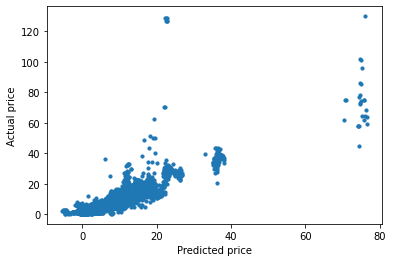

>> RMSE train = 3.387182540992249
>> RMSE validation = 82255023519.14903
>> MAE train = 1.584050859622903
>> MAE validation = 2476715367.5257545


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_features = df1_date_encoding.iloc[:,1:]
y_target = df1_date_encoding['P_PRICE']

train_model(x_features,y_target)

# df2_date

In [ ]:
df2_date = df0_base.copy()

df2_date.drop(['year','week'],axis=1,inplace=True)

df2_date # 날짜 제거

,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기
4,중국,중국,판매용,어류,서대 박대 페루다,서대,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,중국,중국,판매용,어류,복어,은밀복,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,중국,중국,판매용,어류,옥돔,옥돔,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,중국,중국,판매용,어류,복어,까치복,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,중국,중국,판매용,갑각류,새우,흰다리새우,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,노르웨이,노르웨이,판매용,어류,고등어,고등어,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
42067,중국,중국,판매용,연체류 해물모듬,오징어,오징어,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
42069,중국,중국,판매용,연체류 해물모듬,낙지,낙지,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42071,중국,중국,판매용,패류 멍게류,바지락,바지락,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Encoding

In [ ]:
df2_date_encoding = pd.get_dummies(df2_date,columns=['CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1','CATEGORY_2','P_NAME'])

df2_date_encoding

,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,CTRY_1_노르웨이,CTRY_1_베트남,CTRY_1_중국,CTRY_1_칠레,CTRY_1_태국,CTRY_2_노르웨이,CTRY_2_베트남,CTRY_2_중국,CTRY_2_태국,P_PURPOSE_반송품(기타),P_PURPOSE_외화획득용 원료,P_PURPOSE_자사제품제조용,P_PURPOSE_판매용,CATEGORY_1_갑각류,CATEGORY_1_기타 수입식품,...,P_NAME_적새우,"P_NAME_전갱이,POMPANO",P_NAME_젓새우,P_NAME_조피볼락,P_NAME_주꾸미,P_NAME_주름백합,P_NAME_쥐노래미,P_NAME_쥐치,P_NAME_진홍퉁돔,P_NAME_참게,P_NAME_참돔,P_NAME_참복,P_NAME_참조기,P_NAME_청각,P_NAME_청새치,P_NAME_청어알,P_NAME_칠성장어,P_NAME_코드아이스피쉬,P_NAME_큰구슬우렁이,P_NAME_큰민어,P_NAME_키조개,P_NAME_톱날꽃게,P_NAME_틸라피아,P_NAME_피뿔고둥,P_NAME_피조개,P_NAME_학공치,P_NAME_해물혼합,P_NAME_해삼,P_NAME_해파리,P_NAME_홍다리얼룩새우,P_NAME_홍민어,P_NAME_홍어,P_NAME_홍합,P_NAME_화살오징어,P_NAME_황다랑어,P_NAME_황새치,P_NAME_황적퉁돔,P_NAME_흑기흉상어,P_NAME_흑밀복,P_NAME_흰다리새우
4,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42067,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42069,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42071,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Result

Model Training Complete!


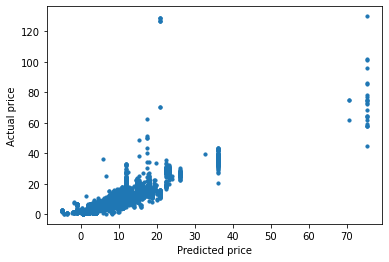

>> RMSE train = 3.4290498067488753
>> RMSE validation = 327009258877.79926
>> MAE train = 1.5636788785758255
>> MAE validation = 8589341701.859511


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_features = df2_date_encoding.iloc[:,1:]
y_target = df2_date_encoding['P_PRICE']

train_model(x_features,y_target)

# df3_date

In [ ]:
df3_date = df0_base.copy()

df3_date

,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,year,week
4,중국,중국,판매용,어류,서대 박대 페루다,서대,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
5,중국,중국,판매용,어류,복어,은밀복,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
6,중국,중국,판매용,어류,옥돔,옥돔,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
7,중국,중국,판매용,어류,복어,까치복,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
8,중국,중국,판매용,갑각류,새우,흰다리새우,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,노르웨이,노르웨이,판매용,어류,고등어,고등어,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1
42067,중국,중국,판매용,연체류 해물모듬,오징어,오징어,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1
42069,중국,중국,판매용,연체류 해물모듬,낙지,낙지,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1
42071,중국,중국,판매용,패류 멍게류,바지락,바지락,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1


## Encoding

In [ ]:
df3_date_encoding = pd.get_dummies(df3_date,columns=['CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1','CATEGORY_2','P_NAME','year','week'])

df3_date_encoding

,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,CTRY_1_노르웨이,CTRY_1_베트남,CTRY_1_중국,CTRY_1_칠레,CTRY_1_태국,CTRY_2_노르웨이,CTRY_2_베트남,CTRY_2_중국,CTRY_2_태국,P_PURPOSE_반송품(기타),P_PURPOSE_외화획득용 원료,P_PURPOSE_자사제품제조용,P_PURPOSE_판매용,CATEGORY_1_갑각류,CATEGORY_1_기타 수입식품,...,week_14,week_15,week_16,week_17,week_18,week_19,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,week_36,week_37,week_38,week_39,week_40,week_41,week_42,week_43,week_44,week_45,week_46,week_47,week_48,week_49,week_50,week_51,week_52,week_53
4,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42067,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42069,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42071,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Result

Model Training Complete!


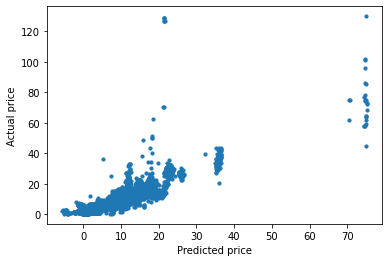

>> RMSE train = 3.408909693863638
>> RMSE validation = 162891833727.83774
>> MAE train = 1.5789484672763965
>> MAE validation = 5464344498.343291


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_features = df3_date_encoding.iloc[:,1:]
y_target = df3_date_encoding['P_PRICE']

train_model(x_features,y_target)

# df4_name

In [ ]:
df4_name = df0_base.copy()

# 어종별 수 컬럼 추가
df4_name['name_cnt'] = 0;
value_dict = {}
for name, value in zip(df4_name['P_NAME'].value_counts().index,df4_name['P_NAME'].value_counts()):
    value_dict[name] = value

def value(col):
    return value_dict[col]

df4_name['name_cnt'] = df4_name['P_NAME'].apply(value)

In [ ]:
df4_name

,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,year,week,name_cnt
4,중국,중국,판매용,어류,서대 박대 페루다,서대,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,74
5,중국,중국,판매용,어류,복어,은밀복,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,117
6,중국,중국,판매용,어류,옥돔,옥돔,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,32
7,중국,중국,판매용,어류,복어,까치복,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,114
8,중국,중국,판매용,갑각류,새우,흰다리새우,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,1915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,노르웨이,노르웨이,판매용,어류,고등어,고등어,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,264
42067,중국,중국,판매용,연체류 해물모듬,오징어,오징어,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,541
42069,중국,중국,판매용,연체류 해물모듬,낙지,낙지,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,1342
42071,중국,중국,판매용,패류 멍게류,바지락,바지락,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,601


## Encoding

In [ ]:
df4_name_encoding = pd.get_dummies(df4_name,columns=['CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1','CATEGORY_2','P_NAME'])

df4_name_encoding

,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,year,week,name_cnt,CTRY_1_노르웨이,CTRY_1_베트남,CTRY_1_중국,CTRY_1_칠레,CTRY_1_태국,CTRY_2_노르웨이,CTRY_2_베트남,CTRY_2_중국,CTRY_2_태국,P_PURPOSE_반송품(기타),P_PURPOSE_외화획득용 원료,P_PURPOSE_자사제품제조용,...,P_NAME_적새우,"P_NAME_전갱이,POMPANO",P_NAME_젓새우,P_NAME_조피볼락,P_NAME_주꾸미,P_NAME_주름백합,P_NAME_쥐노래미,P_NAME_쥐치,P_NAME_진홍퉁돔,P_NAME_참게,P_NAME_참돔,P_NAME_참복,P_NAME_참조기,P_NAME_청각,P_NAME_청새치,P_NAME_청어알,P_NAME_칠성장어,P_NAME_코드아이스피쉬,P_NAME_큰구슬우렁이,P_NAME_큰민어,P_NAME_키조개,P_NAME_톱날꽃게,P_NAME_틸라피아,P_NAME_피뿔고둥,P_NAME_피조개,P_NAME_학공치,P_NAME_해물혼합,P_NAME_해삼,P_NAME_해파리,P_NAME_홍다리얼룩새우,P_NAME_홍민어,P_NAME_홍어,P_NAME_홍합,P_NAME_화살오징어,P_NAME_황다랑어,P_NAME_황새치,P_NAME_황적퉁돔,P_NAME_흑기흉상어,P_NAME_흑밀복,P_NAME_흰다리새우
4,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,74,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,117,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,32,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,114,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,1915,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,264,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42067,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,541,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42069,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,1342,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42071,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,601,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Result

Model Training Complete!


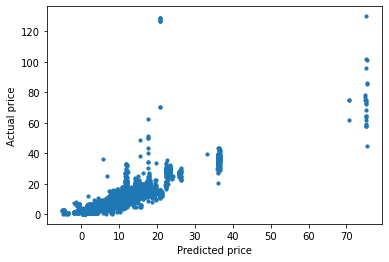

>> RMSE train = 3.42089564799516
>> RMSE validation = 2354840.409271804
>> MAE train = 1.5506718949586495
>> MAE validation = 67446.16646570613


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_features = df4_name_encoding.iloc[:,1:]
y_target = df4_name_encoding['P_PRICE']

train_model(x_features,y_target)

# df5_import

In [ ]:
df5_import = df0_base.copy()

df5_import['import_cnt'] = 0
for i, row in df5_import.iterrows():
    for name in import_type_list:
        if row[name] == 1:
            df5_import.at[i, 'import_cnt'] += 1

In [ ]:
df5_import

,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,year,week,import_cnt
4,중국,중국,판매용,어류,서대 박대 페루다,서대,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,1
5,중국,중국,판매용,어류,복어,은밀복,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,1
6,중국,중국,판매용,어류,옥돔,옥돔,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,1
7,중국,중국,판매용,어류,복어,까치복,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,1
8,중국,중국,판매용,갑각류,새우,흰다리새우,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,노르웨이,노르웨이,판매용,어류,고등어,고등어,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,1
42067,중국,중국,판매용,연체류 해물모듬,오징어,오징어,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,1
42069,중국,중국,판매용,연체류 해물모듬,낙지,낙지,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,1
42071,중국,중국,판매용,패류 멍게류,바지락,바지락,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,1


## Encoding

In [ ]:
df5_import_encoding = pd.get_dummies(df5_import,columns=['CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1','CATEGORY_2','P_NAME'])

df5_import_encoding

,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,year,week,import_cnt,CTRY_1_노르웨이,CTRY_1_베트남,CTRY_1_중국,CTRY_1_칠레,CTRY_1_태국,CTRY_2_노르웨이,CTRY_2_베트남,CTRY_2_중국,CTRY_2_태국,P_PURPOSE_반송품(기타),P_PURPOSE_외화획득용 원료,P_PURPOSE_자사제품제조용,...,P_NAME_적새우,"P_NAME_전갱이,POMPANO",P_NAME_젓새우,P_NAME_조피볼락,P_NAME_주꾸미,P_NAME_주름백합,P_NAME_쥐노래미,P_NAME_쥐치,P_NAME_진홍퉁돔,P_NAME_참게,P_NAME_참돔,P_NAME_참복,P_NAME_참조기,P_NAME_청각,P_NAME_청새치,P_NAME_청어알,P_NAME_칠성장어,P_NAME_코드아이스피쉬,P_NAME_큰구슬우렁이,P_NAME_큰민어,P_NAME_키조개,P_NAME_톱날꽃게,P_NAME_틸라피아,P_NAME_피뿔고둥,P_NAME_피조개,P_NAME_학공치,P_NAME_해물혼합,P_NAME_해삼,P_NAME_해파리,P_NAME_홍다리얼룩새우,P_NAME_홍민어,P_NAME_홍어,P_NAME_홍합,P_NAME_화살오징어,P_NAME_황다랑어,P_NAME_황새치,P_NAME_황적퉁돔,P_NAME_흑기흉상어,P_NAME_흑밀복,P_NAME_흰다리새우
4,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,3,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,1,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42067,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42069,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42071,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Result

Model Training Complete!


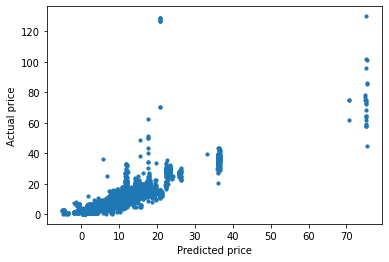

>> RMSE train = 3.4208956163941475
>> RMSE validation = 81480249.38039465
>> MAE train = 1.5506699446593335
>> MAE validation = 1827722.9394137342


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_features = df5_import_encoding.iloc[:,1:]
y_target = df5_import_encoding['P_PRICE']

train_model(x_features,y_target)

# df6_category

In [ ]:
df6_category = df0_base.copy()

df6_category.drop(['CATEGORY_2','P_NAME'],axis=1,inplace=True)

In [ ]:
df6_category

,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,year,week
4,중국,중국,판매용,어류,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
5,중국,중국,판매용,어류,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
6,중국,중국,판매용,어류,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
7,중국,중국,판매용,어류,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
8,중국,중국,판매용,갑각류,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,노르웨이,노르웨이,판매용,어류,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1
42067,중국,중국,판매용,연체류 해물모듬,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1
42069,중국,중국,판매용,연체류 해물모듬,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1
42071,중국,중국,판매용,패류 멍게류,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1


## Encoding

In [ ]:
df6_category_encoding = pd.get_dummies(df6_category,columns=['CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1'])

df6_category_encoding

,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,year,week,CTRY_1_노르웨이,CTRY_1_베트남,CTRY_1_중국,CTRY_1_칠레,CTRY_1_태국,CTRY_2_노르웨이,CTRY_2_베트남,CTRY_2_중국,CTRY_2_태국,P_PURPOSE_반송품(기타),P_PURPOSE_외화획득용 원료,P_PURPOSE_자사제품제조용,P_PURPOSE_판매용,CATEGORY_1_갑각류,CATEGORY_1_기타 수입식품,CATEGORY_1_알 곤이류,CATEGORY_1_어류,CATEGORY_1_연체류 해물모듬,CATEGORY_1_젓갈류 해조류 해파리,CATEGORY_1_패류 멍게류
4,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
5,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
7,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
8,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
42067,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
42069,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
42071,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


## Result

Model Training Complete!


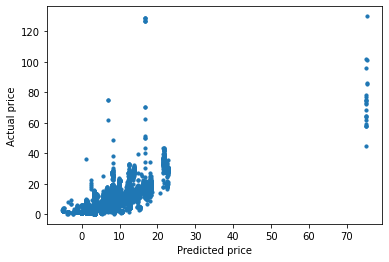

>> RMSE train = 4.982119498688406
>> RMSE validation = 5.191396778664673
>> MAE train = 3.0160413292664745
>> MAE validation = 2.980202584327209


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_features = df6_category_encoding.iloc[:,1:]
y_target = df6_category_encoding['P_PRICE']

train_model(x_features,y_target)

# df7_category

In [ ]:
df7_category = df0_base.copy()

df7_category.drop(['CATEGORY_1','CATEGORY_2'],axis=1,inplace=True)

In [ ]:
df7_category

,CTRY_1,CTRY_2,P_PURPOSE,P_NAME,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,year,week
4,중국,중국,판매용,서대,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
5,중국,중국,판매용,은밀복,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
6,중국,중국,판매용,옥돔,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
7,중국,중국,판매용,까치복,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
8,중국,중국,판매용,흰다리새우,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,노르웨이,노르웨이,판매용,고등어,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1
42067,중국,중국,판매용,오징어,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1
42069,중국,중국,판매용,낙지,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1
42071,중국,중국,판매용,바지락,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1


## Encoding

In [ ]:
df7_category_encoding = pd.get_dummies(df7_category,columns=['CTRY_1','CTRY_2','P_PURPOSE','P_NAME'])

df7_category_encoding

,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,year,week,CTRY_1_노르웨이,CTRY_1_베트남,CTRY_1_중국,CTRY_1_칠레,CTRY_1_태국,CTRY_2_노르웨이,CTRY_2_베트남,CTRY_2_중국,CTRY_2_태국,P_PURPOSE_반송품(기타),P_PURPOSE_외화획득용 원료,P_PURPOSE_자사제품제조용,P_PURPOSE_판매용,...,P_NAME_적새우,"P_NAME_전갱이,POMPANO",P_NAME_젓새우,P_NAME_조피볼락,P_NAME_주꾸미,P_NAME_주름백합,P_NAME_쥐노래미,P_NAME_쥐치,P_NAME_진홍퉁돔,P_NAME_참게,P_NAME_참돔,P_NAME_참복,P_NAME_참조기,P_NAME_청각,P_NAME_청새치,P_NAME_청어알,P_NAME_칠성장어,P_NAME_코드아이스피쉬,P_NAME_큰구슬우렁이,P_NAME_큰민어,P_NAME_키조개,P_NAME_톱날꽃게,P_NAME_틸라피아,P_NAME_피뿔고둥,P_NAME_피조개,P_NAME_학공치,P_NAME_해물혼합,P_NAME_해삼,P_NAME_해파리,P_NAME_홍다리얼룩새우,P_NAME_홍민어,P_NAME_홍어,P_NAME_홍합,P_NAME_화살오징어,P_NAME_황다랑어,P_NAME_황새치,P_NAME_황적퉁돔,P_NAME_흑기흉상어,P_NAME_흑밀복,P_NAME_흰다리새우
4,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,4.265697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,7.202863,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42066,2.191897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,1,0,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42067,4.108244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2020,1,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42069,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42071,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,0,0,1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Result

Model Training Complete!


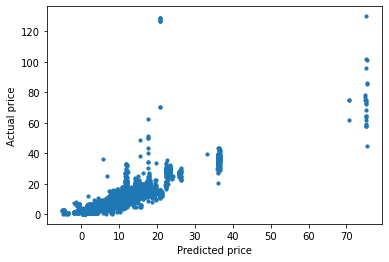

>> RMSE train = 3.420895682455792
>> RMSE validation = 12424202.811240055
>> MAE train = 1.5506705125260871
>> MAE validation = 513287.5265742912


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_features = df7_category_encoding.iloc[:,1:]
y_target = df7_category_encoding['P_PRICE']

train_model(x_features,y_target)

# df8_add

In [ ]:
df8_add = pd.merge(df0_base, df_weather_kr, how='left', on=['year', 'week'])
df8_add = pd.merge(df8_add, df_weather, how='left', on=['year', 'week', 'CTRY_1'])
df8_add = pd.merge(df8_add, df_oil, how='left', on=['year', 'week'])
df8_add = pd.merge(df8_add, df_cpi, how='left', on=['year', 'week'])
df8_add = pd.merge(df8_add, df_exchange, how='left', on=['year', 'week', 'CTRY_2'])

In [ ]:
df8_add

,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange
0,중국,중국,판매용,어류,서대 박대 페루다,서대,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.22,101.26,0.1541
1,중국,중국,판매용,어류,서대 박대 페루다,서대,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.39,100.76,0.1541
2,중국,중국,판매용,어류,복어,은밀복,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.22,101.26,0.1541
3,중국,중국,판매용,어류,복어,은밀복,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.39,100.76,0.1541
4,중국,중국,판매용,어류,옥돔,옥돔,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.22,101.26,0.1541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23019,중국,중국,판매용,연체류 해물모듬,낙지,낙지,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,6.534266,6.942657,13.188652,2.045970,2.498507,5.346567,61.66,105.79,118.44,0.1431
23020,중국,중국,판매용,패류 멍게류,바지락,바지락,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,6.534266,6.942657,13.188652,2.045970,2.498507,5.346567,61.66,105.12,116.99,0.1431
23021,중국,중국,판매용,패류 멍게류,바지락,바지락,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,6.534266,6.942657,13.188652,2.045970,2.498507,5.346567,61.66,105.79,118.44,0.1431
23022,노르웨이,노르웨이,판매용,어류,연어,연어,13.205675,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2020,1,6.534266,6.942657,13.188652,3.050417,7.291667,0.154701,61.66,105.12,116.99,0.1134


In [ ]:
df8_add_encoding = pd.get_dummies(df8_add,columns=['CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1','CATEGORY_2','P_NAME'])

df8_add_encoding

,P_PRICE,다리,간,살,알,자숙,활,슬라이스(S),절단,지느러미,횟감,껍질,한쪽껍질붙은,목살,건조,포장횟감,캐비아대용,개아지살,필렛(F),염장,냉장,곤이,냉동,동체,줄기,year,week,wind_kr,temperature_kr,water_temp_kr,rain,wind,temperature,oil,cpi_total,cpi_fish,exchange,CTRY_1_노르웨이,CTRY_1_베트남,CTRY_1_중국,...,P_NAME_적새우,"P_NAME_전갱이,POMPANO",P_NAME_젓새우,P_NAME_조피볼락,P_NAME_주꾸미,P_NAME_주름백합,P_NAME_쥐노래미,P_NAME_쥐치,P_NAME_진홍퉁돔,P_NAME_참게,P_NAME_참돔,P_NAME_참복,P_NAME_참조기,P_NAME_청각,P_NAME_청새치,P_NAME_청어알,P_NAME_칠성장어,P_NAME_코드아이스피쉬,P_NAME_큰구슬우렁이,P_NAME_큰민어,P_NAME_키조개,P_NAME_톱날꽃게,P_NAME_틸라피아,P_NAME_피뿔고둥,P_NAME_피조개,P_NAME_학공치,P_NAME_해물혼합,P_NAME_해삼,P_NAME_해파리,P_NAME_홍다리얼룩새우,P_NAME_홍민어,P_NAME_홍어,P_NAME_홍합,P_NAME_화살오징어,P_NAME_황다랑어,P_NAME_황새치,P_NAME_황적퉁돔,P_NAME_흑기흉상어,P_NAME_흑밀복,P_NAME_흰다리새우
0,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.22,101.26,0.1541,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.791340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.39,100.76,0.1541,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.22,101.26,0.1541,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.167951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.39,100.76,0.1541,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.145111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2015,53,5.352941,7.973109,13.732174,1.101826,2.242009,6.697717,37.08,100.22,101.26,0.1541,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23019,8.282274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,6.534266,6.942657,13.188652,2.045970,2.498507,5.346567,61.66,105.79,118.44,0.1431,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23020,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,6.534266,6.942657,13.188652,2.045970,2.498507,5.346567,61.66,105.12,116.99,0.1431,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23021,0.852967,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,6.534266,6.942657,13.188652,2.045970,2.498507,5.346567,61.66,105.79,118.44,0.1431,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23022,13.205675,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2020,1,6.534266,6.942657,13.188652,3.050417,7.291667,0.154701,61.66,105.12,116.99,0.1134,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Model Training Complete!


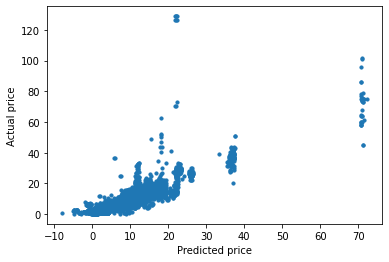

>> RMSE train = 3.3531124992188923
>> RMSE validation = 129901995.02501158
>> MAE train = 1.5563776526674564
>> MAE validation = 2591519.5176498163


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_features = df8_add_encoding.iloc[:,1:]
y_target = df8_add_encoding['P_PRICE']

train_model(x_features,y_target)